In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.font_manager as fm
fm._load_fontmanager(try_read_cache=False)

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

print('Korean Font Setting Success')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Korean Font Setting Success


In [2]:
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

생존여부 0=사망 1=생존  
객실등급  
성별  
나이  
함께 탑승한 형제자매/배우자 수  
함께 탑슨한 부모/자녀 수  
탑승 요금  
탑승 항구 코드  
객실등급 문자형  
승객 구분 남성 여성 아이  
성인 남성 여부  
객실 갑판  
탑승 항구 도시명  
생존 여부 문자형  
혼자 탑승 여부

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


891행과 15개의 열로 구성  
수치형 데이터와 범주형 데이터가 함께 존재  
정수형 실수형 데이터도 존재  
논리값 데이터도 포함  
  
age 컬럼은 714개만 값이 존재하여 결측값이 있음  
deck 컬럼은 결측값이 매우 많음  
일부 컬럼은 분석 전에 결측값 처리 필요함

#선그래프

Index([1, 2, 3], dtype='int64', name='pclass')
[0.62962963 0.47282609 0.24236253]


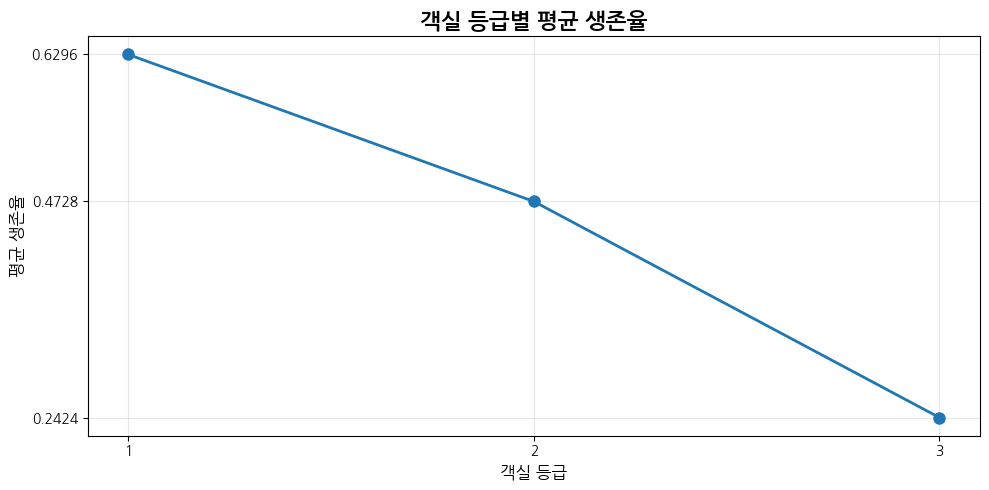

In [5]:
pclass = titanic.groupby('pclass')['survived'].mean().index
print(pclass)
survival_rate = titanic.groupby('pclass')['survived'].mean().values
print(survival_rate)
plt.figure(figsize=(10, 5))
plt.plot(pclass, survival_rate, marker='o', linewidth=2, markersize=8)
plt.title('객실 등급별 평균 생존율', fontsize=16, fontweight='bold')
plt.xlabel('객실 등급', fontsize=12)
plt.ylabel('평균 생존율', fontsize=12)
plt.xticks(pclass)
plt.yticks(survival_rate)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [6]:
survival_data = titanic.groupby('pclass')['survived'].mean().reset_index()
print(survival_data)

   pclass  survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


위 코드에서 `reset_index()`를 호출하면 `pclass`가 컬럼으로, 평균 생존율이 `survived`라는 이름의 컬럼으로 포함된 DataFrame이 생성됩니다. 이 DataFrame을 사용하여 그래프를 그릴 수 있습니다.

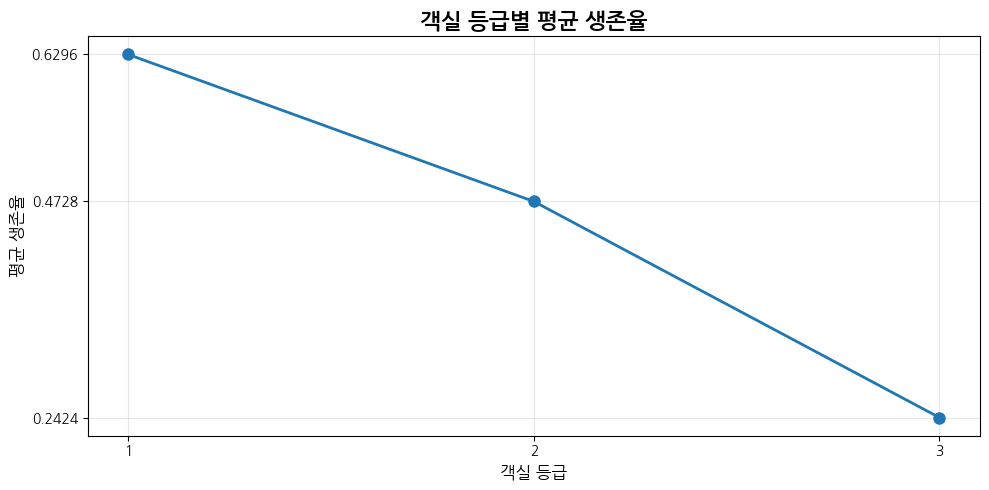

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(survival_data['pclass'], survival_data['survived'], marker='o', linewidth=2, markersize=8)
plt.title('객실 등급별 평균 생존율', fontsize=16, fontweight='bold')
plt.xlabel('객실 등급', fontsize=12)
plt.ylabel('평균 생존율', fontsize=12)
plt.xticks(survival_data['pclass'])
plt.yticks(survival_data['survived'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#막대 그래프

survived
0    549
1    342
Name: count, dtype: int64


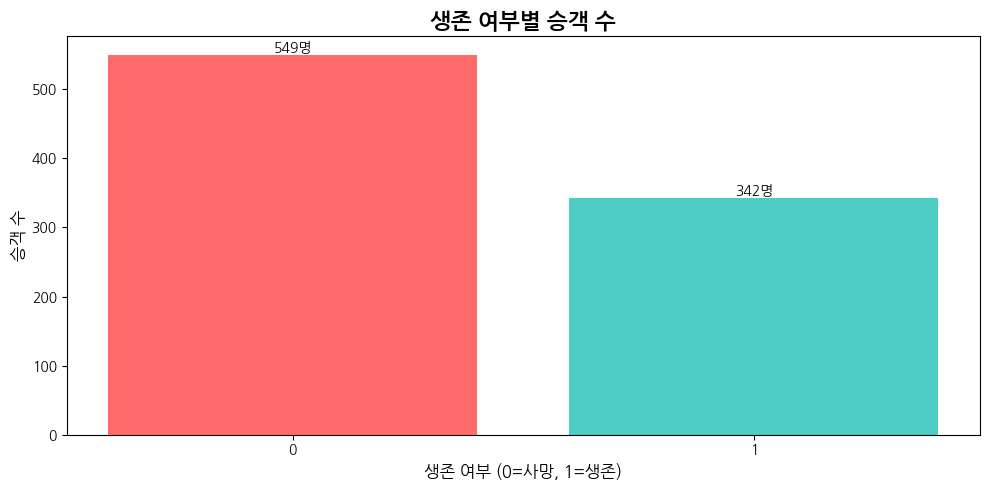

In [8]:
survived_counts = titanic["survived"].value_counts()
print(survived_counts)

plt.figure(figsize=(10, 5))
bars = plt.bar(survived_counts.index, survived_counts.values, color=['#FF6B6B', '#4ECDC4'])
plt.title('생존 여부별 승객 수', fontsize=16, fontweight='bold')
plt.xlabel('생존 여부 (0=사망, 1=생존)', fontsize=12)
plt.ylabel('승객 수', fontsize=12)
plt.xticks(survived_counts.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#산점도

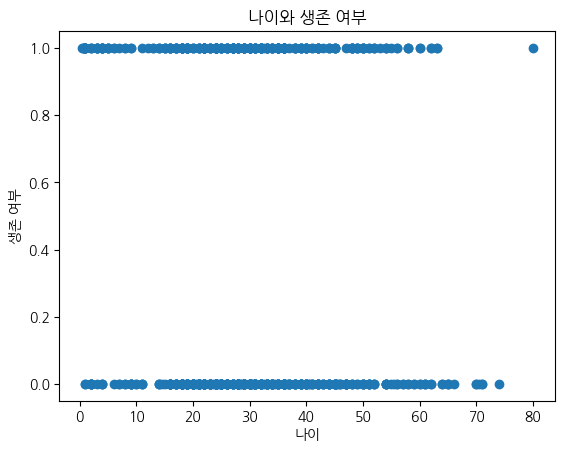

In [9]:
plt.scatter(titanic['age'], titanic['survived'])
plt.title('나이와 생존 여부')
plt.xlabel('나이')
plt.ylabel('생존 여부')
plt.show()

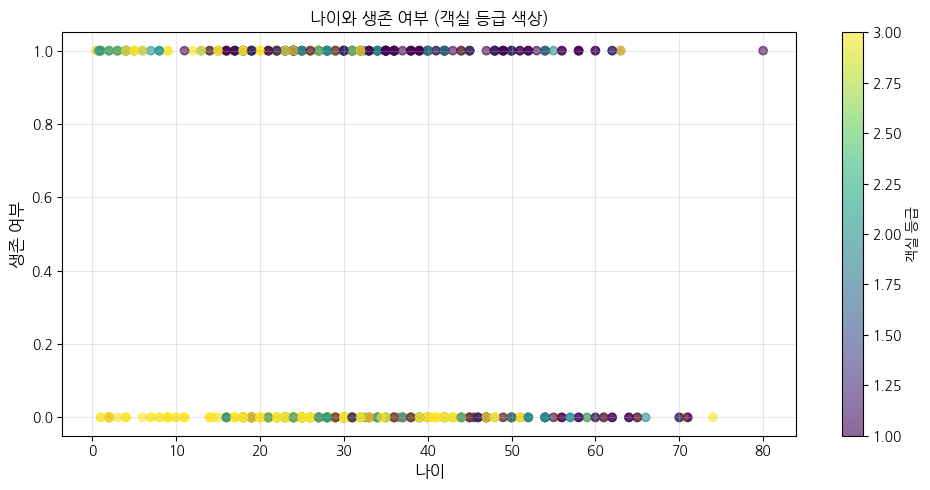

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(titanic['age'], titanic['survived'], c=titanic['pclass'], cmap='viridis', alpha=0.6)
plt.title('나이와 생존 여부 (객실 등급 색상)')
plt.xlabel('나이', fontsize=12)
plt.ylabel('생존 여부', fontsize=12)
plt.colorbar(label='객실 등급')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

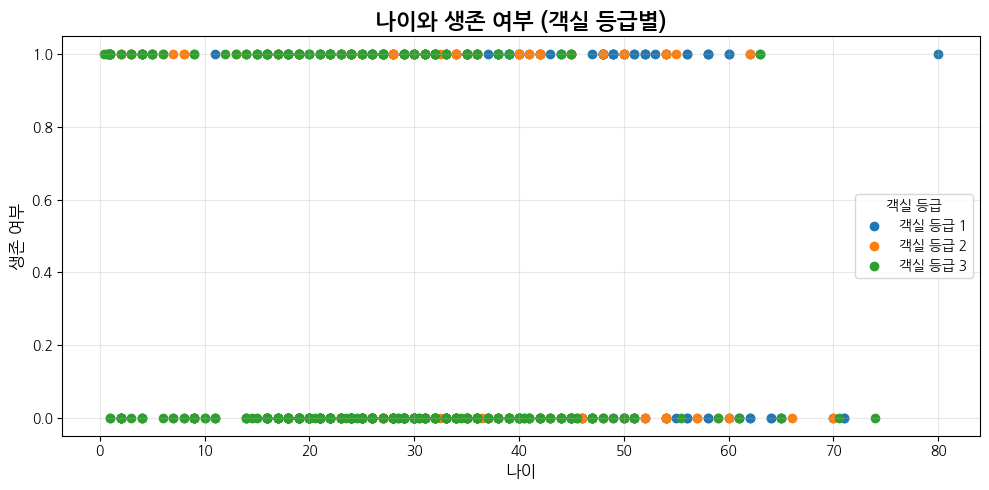

In [11]:
plt.figure(figsize=(10,5))
for pclass_val in sorted(titanic['pclass'].unique()):
    subset = titanic[titanic['pclass'] == pclass_val]
    plt.scatter(subset['age'], subset['survived'], label=f'객실 등급 {pclass_val}', alpha=1)

plt.title('나이와 생존 여부 (객실 등급별)', fontsize=16, fontweight='bold')
plt.xlabel('나이', fontsize=12)
plt.ylabel('생존 여부', fontsize=12)
plt.legend(title='객실 등급')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

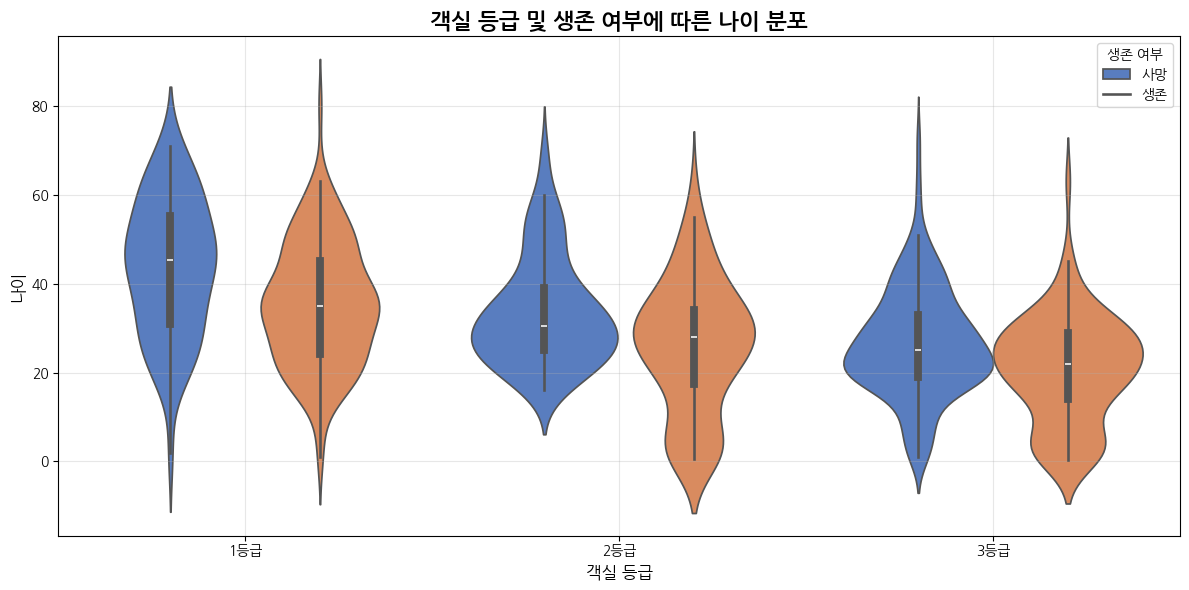

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='pclass', y='age', hue='survived', data=titanic, palette='muted')
plt.title('객실 등급 및 생존 여부에 따른 나이 분포', fontsize=16, fontweight='bold')
plt.xlabel('객실 등급', fontsize=12)
plt.ylabel('나이', fontsize=12)
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#히스토그램

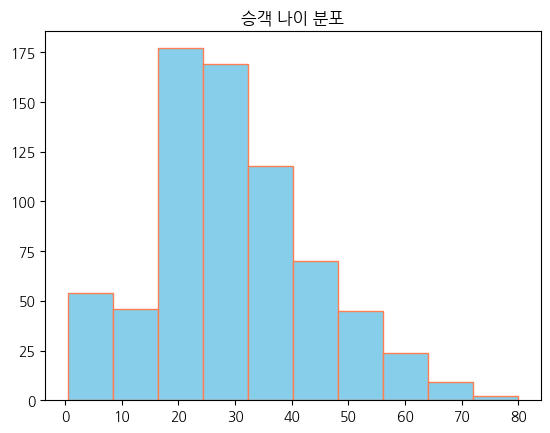

In [13]:
plt.hist(titanic['age'].dropna(), bins=10, color='skyblue', edgecolor='coral')
plt.title('승객 나이 분포')
plt.show()

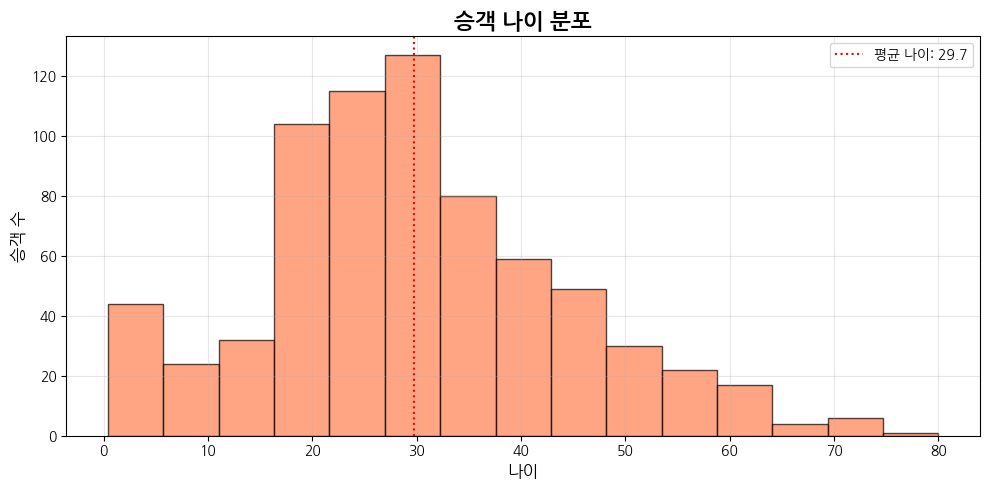

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(titanic['age'].dropna(), bins=15, color='coral', edgecolor='k', alpha=0.7)
plt.title('승객 나이 분포', fontsize=16, fontweight='bold')
plt.xlabel('나이', fontsize=12)
plt.ylabel('승객 수', fontsize=12)
plt.axvline(titanic['age'].mean(), color='red', linestyle=':', label=f'평균 나이: {titanic["age"].mean():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#서브플롯

In [15]:
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# # axes[0,0].plot
# # axes[0,0].set_title("")

# # axes[0,1].
# # axes[0,1].set_title("")

# # axes[1,0].
# # axes[1,0].set_title("")

# # axes[1,1].
# # axes[1,1].set_title("")

비교 -> 막대그래프  
변화 -> 선그래프  
분포 -> 히스토그램  
관계 -> 산점

#와인 데이터 시각화 실습

In [16]:
url = '/content/drive/MyDrive/Colab Notebooks/winequality-red-sorting.csv'
wine = pd.read_csv(url)

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
print(wine.columns.to_list())
print(len(wine.columns.to_list()))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
12


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#선그래프

   quality    alcohol
0        3   9.955000
1        4  10.265094
2        5   9.899706
3        6  10.629519
4        7  11.465913
5        8  12.094444


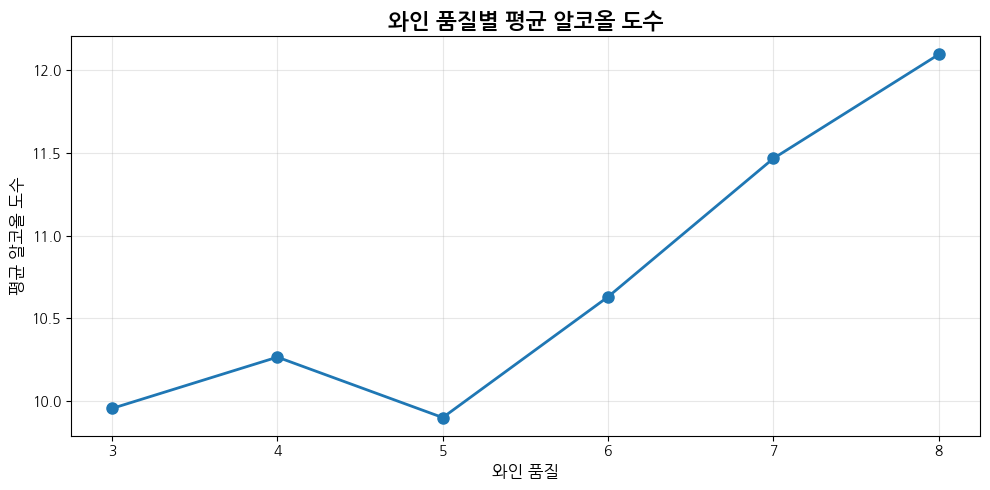

In [19]:
quality_df = wine.groupby('quality')['alcohol'].mean().reset_index()
print(quality_df)

plt.figure(figsize=(10, 5))
plt.plot(quality_df['quality'], quality_df['alcohol'], marker='o', linewidth=2, markersize=8)
plt.title('와인 품질별 평균 알코올 도수', fontsize=16, fontweight='bold')
plt.xlabel('와인 품질', fontsize=12)
plt.ylabel('평균 알코올 도수', fontsize=12)
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()

#막대 그래프

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


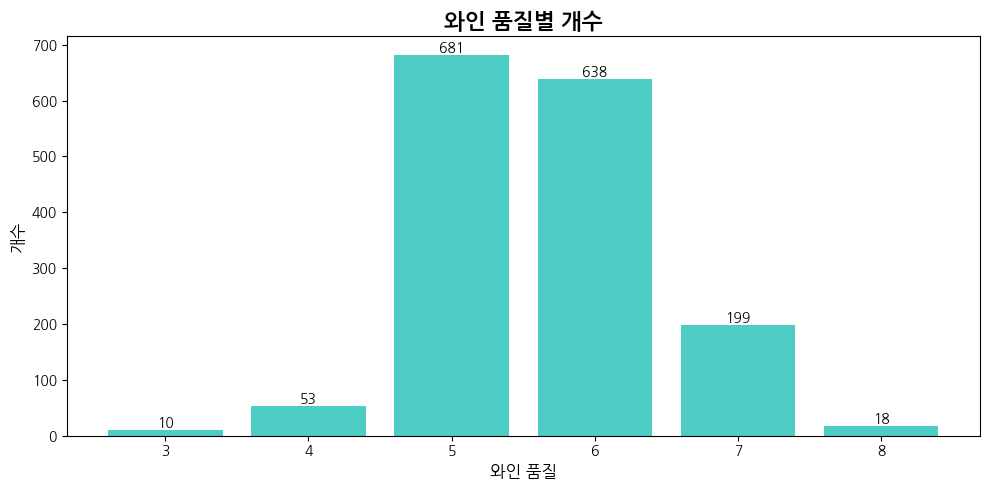

In [21]:
quality_counts = wine['quality'].value_counts().sort_index()
print(quality_counts)

plt.figure(figsize=(10, 5))
bars = plt.bar(quality_counts.index, quality_counts.values, color='#4ECDC4')
plt.title('와인 품질별 개수', fontsize=16, fontweight='bold')
plt.xlabel('와인 품질', fontsize=12)
plt.ylabel('개수', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#산점도

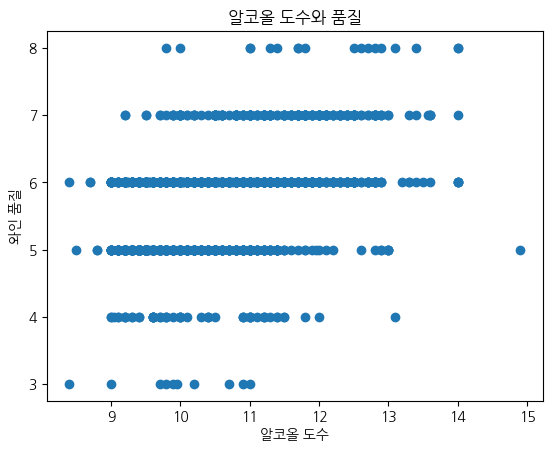

In [22]:
plt.scatter(wine['alcohol'], wine['quality'])
plt.title('알코올 도수와 품질')
plt.xlabel('알코올 도수')
plt.ylabel('와인 품질')

plt.show()

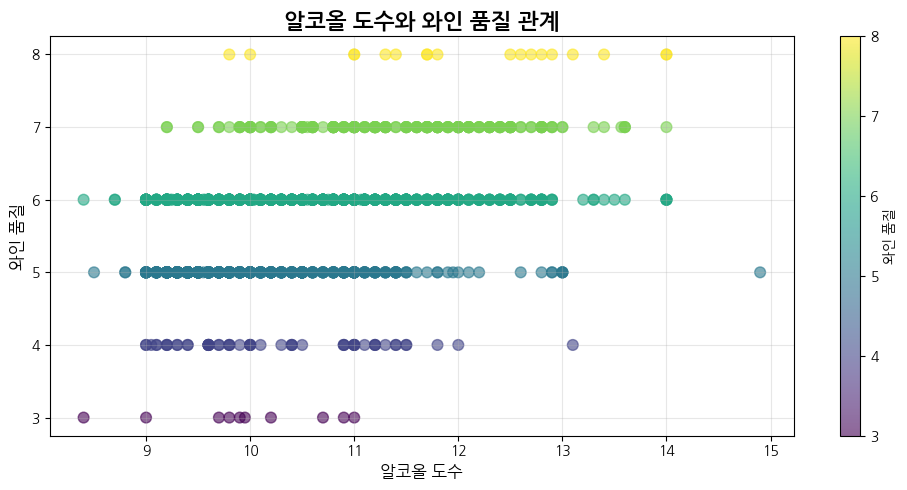

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(wine['alcohol'], wine['quality'], c=wine['quality'], cmap='viridis', s=60, alpha=.6)
plt.title('알코올 도수와 와인 품질 관계', fontsize=16, fontweight='bold')
plt.xlabel('알코올 도수', fontsize=12)
plt.ylabel('와인 품질', fontsize=12)
plt.colorbar(label='와인 품질')
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()

#히스토그램

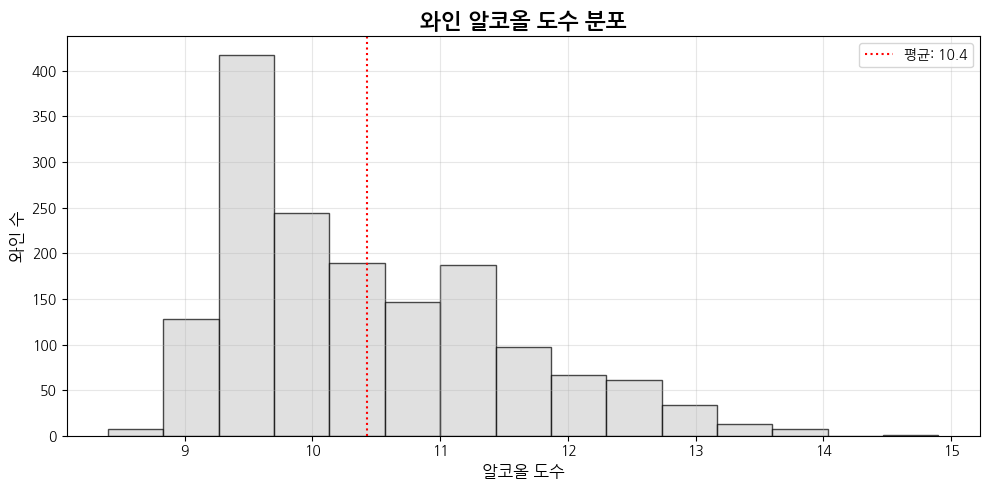

In [32]:
plt.figure(figsize=(10, 5))
plt.hist(wine['alcohol'], bins=15, color='lightgray', edgecolor='k', alpha=.7)
plt.title('와인 알코올 도수 분포', fontsize=16, fontweight='bold')
plt.xlabel('알코올 도수', fontsize=12)
plt.ylabel('와인 수', fontsize=12)
plt.axvline(wine['alcohol'].mean(), color='red', linestyle=':', label=f'평균: {wine['alcohol'].mean():.1f}')
plt.legend()
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()

#서브플롯

(array([  7., 128., 417., 244., 189., 147., 187.,  97.,  67.,  61.,  34.,
         13.,   7.,   0.,   1.]),
 array([ 8.4       ,  8.83333333,  9.26666667,  9.7       , 10.13333333,
        10.56666667, 11.        , 11.43333333, 11.86666667, 12.3       ,
        12.73333333, 13.16666667, 13.6       , 14.03333333, 14.46666667,
        14.9       ]),
 <BarContainer object of 15 artists>)

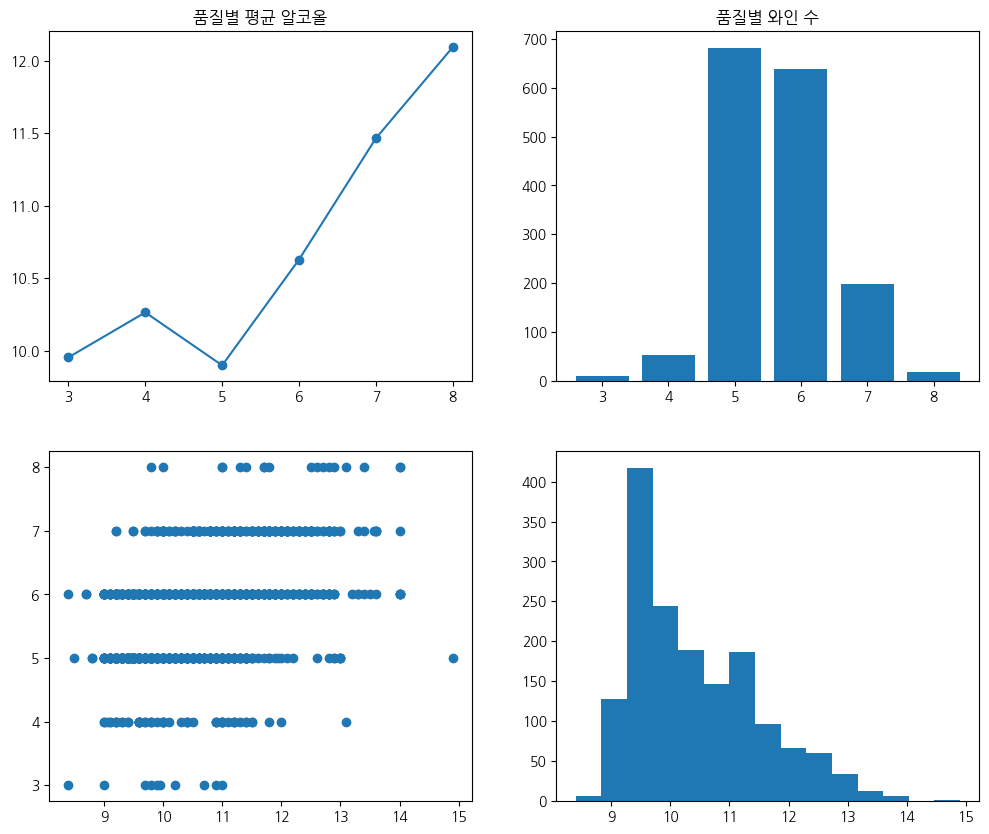

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].plot(quality_df['quality'], quality_df['alcohol'], marker='o')
axes[0,0].set_title('품질별 평균 알코올')

axes[0,1].bar(quality_counts.index, quality_counts.values)
axes[0,1].set_title('품질별 와인 수')

axes[1,0].scatter(wine['alcohol'], wine['quality'])
# axes[1,0].

axes[1,1].hist(wine['alcohol'], bins=15)
# axes[1,1].

#Seaborn 실습

In [50]:
tips =sns.load_dataset('tips')
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [42]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [46]:
tips.columns.to_list()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [54]:
tips_kr = tips.copy()
tips_kr.columns = ['총계', '팁', '성별', '흡연여부', '요일', '시간대', '인원']
tips_kr['가격'] = tips_kr['총계'] - tips_kr['팁']
tips_kr.head(10)

,총계,팁,성별,흡연여부,요일,시간대,인원,가격
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98
5,25.29,4.71,Male,No,Sun,Dinner,4,20.58
6,8.77,2.00,Male,No,Sun,Dinner,2,6.77
7,26.88,3.12,Male,No,Sun,Dinner,4,23.76
8,15.04,1.96,Male,No,Sun,Dinner,2,13.08
9,14.78,3.23,Male,No,Sun,Dinner,2,11.55


In [55]:
tips_kr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   총계      244 non-null    float64 
 1   팁       244 non-null    float64 
 2   성별      244 non-null    category
 3   흡연여부    244 non-null    category
 4   요일      244 non-null    category
 5   시간대     244 non-null    category
 6   인원      244 non-null    int64   
 7   가격      244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB


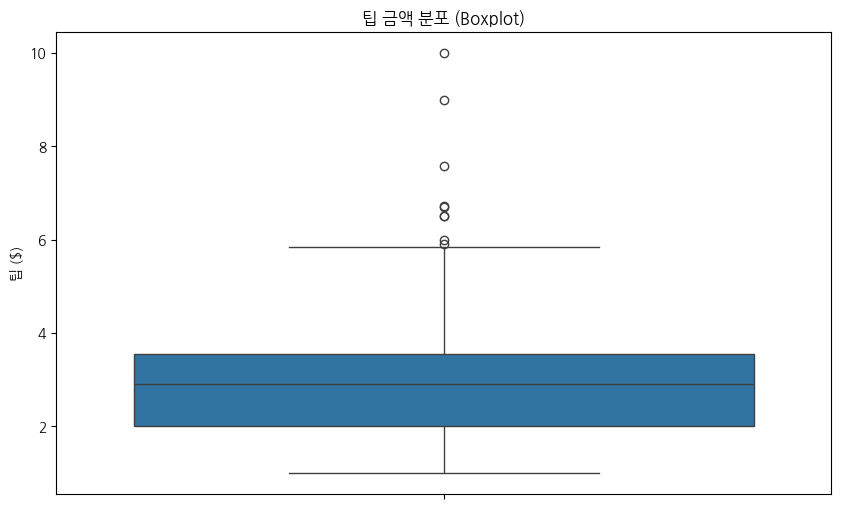

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(tips_kr['팁'])

plt.title('팁 금액 분포 (Boxplot)')
plt.ylabel('팁 ($)')

plt.show()

In [100]:
plt.figure(figsize=(10, 6))
plt.boxplot([tips_kr[tips_kr['요일'] == day]['팁'] for day in ['Thur', 'Fri', 'Sat', 'Sun']],
                    tick_labels=['목요일', '금요일', '토요일', '일요일'])

plt.title('요일별 팁 금액 분포 (Boxplot)', fontsize=16, fontweight='bold')
plt.ylabel('팁 ($)', fontsize=12)
plt.xlabel('요일', fontsize=12)
plt.grid(True, alpha=.3, axis='y')
plt.show()

팁이 0인 데이터는 존재하지 않습니다.


#바이올린 그래프

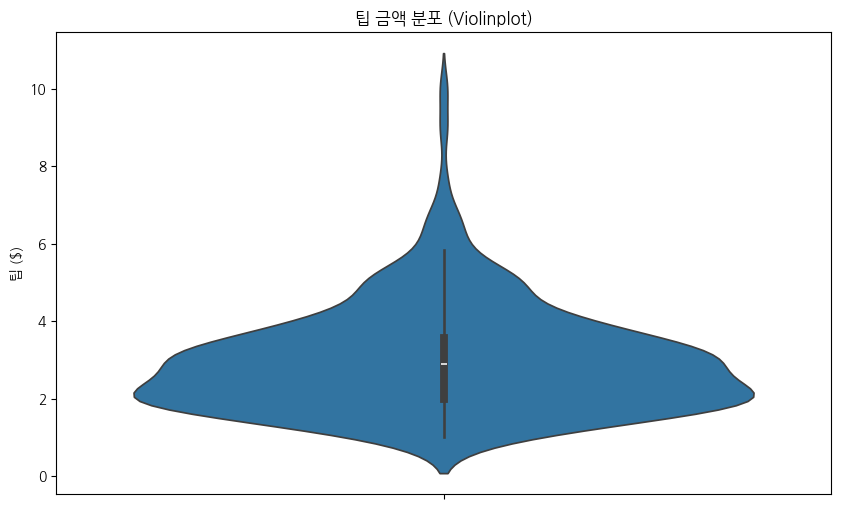

In [76]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=tips['tip'])

plt.title('팁 금액 분포 (Violinplot)')
plt.ylabel('팁 ($)')

plt.show()

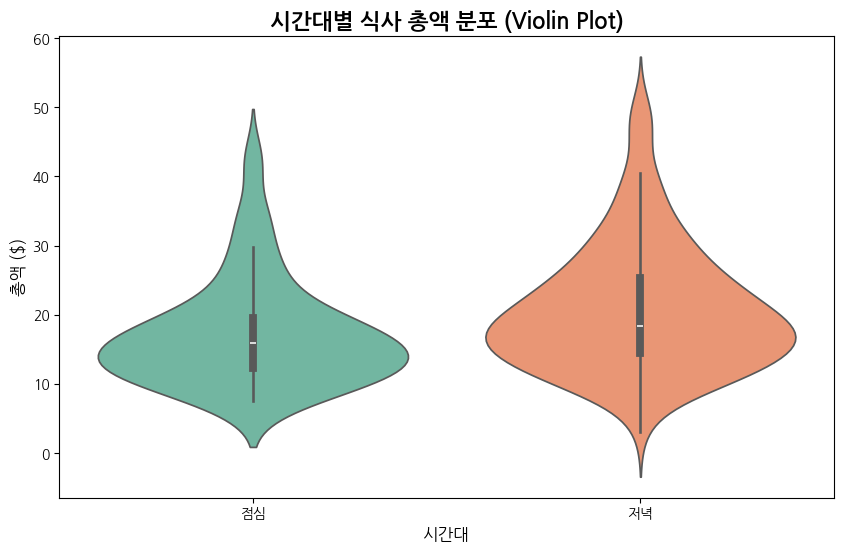

In [79]:
tips_kr['시간대_kr'] = tips_kr['시간대'].map({'Dinner': '저녁', 'Lunch': '점심'})
plt.figure(figsize=(10, 6))
sns.violinplot(data=tips_kr, x='시간대_kr', y='총계', hue='시간대_kr', palette='Set2')
plt.title('시간대별 식사 총액 분포 (Violin Plot)', fontsize=16, fontweight='bold')
plt.xlabel('시간대', fontsize=12)
plt.ylabel('총액 ($)', fontsize=12)

plt.show()

#히스토그램

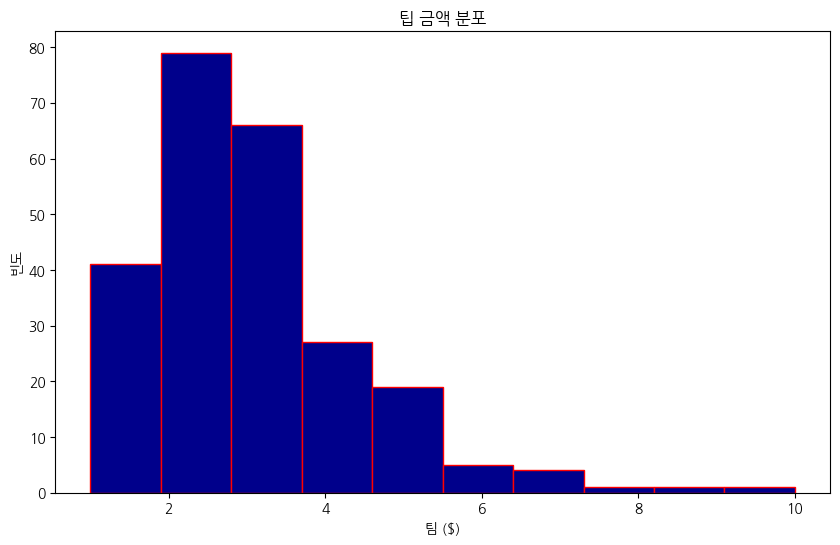

In [93]:
plt.figure(figsize=(10,6))
plt.hist(tips['tip'], bins=10, color='darkblue', edgecolor='r')

plt.title('팁 금액 분포')
plt.xlabel('팁 ($)')
plt.ylabel('빈도')

plt.show()

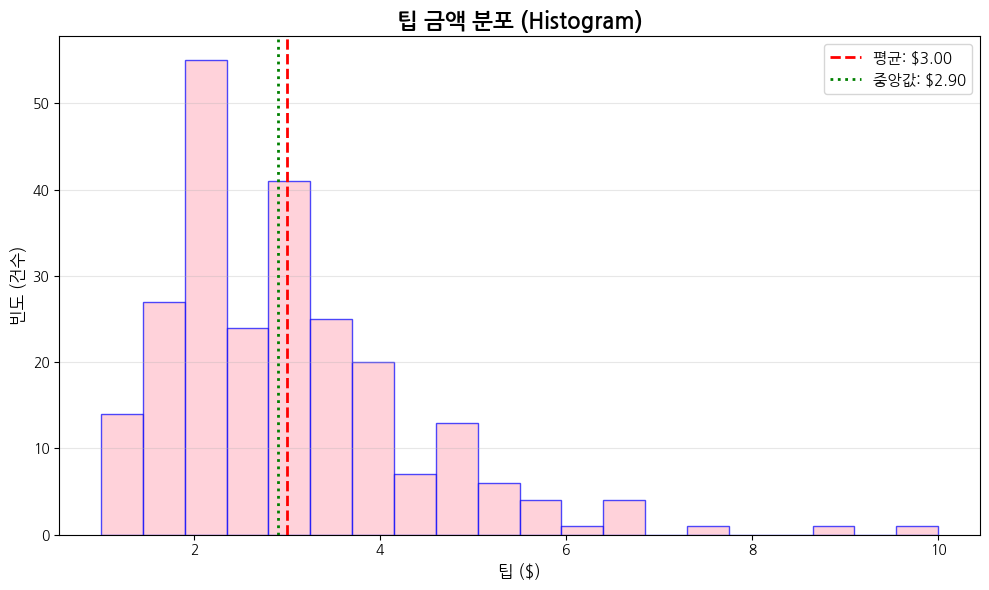

In [99]:
plt.figure(figsize=(10,6))
plt.hist(tips_kr['팁'], bins=20, color='pink', edgecolor='blue', alpha=.7)

plt.axvline(tips_kr['팁'].mean(), color='red', linestyle='--', label=f"평균: ${tips_kr['팁'].mean():.2f}", linewidth=2)
plt.axvline(tips_kr['팁'].median(), color='g', linestyle=':', label=f"중앙값: ${tips_kr['팁'].median():.2f}", linewidth=2)
plt.title('팁 금액 분포 (Histogram)', fontsize=16, fontweight='bold')
plt.xlabel('팁 ($)', fontsize=12)
plt.ylabel('빈도 (건수)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=.3, axis='y')
plt.tight_layout()
plt.show()

평균과 중앙값: 팁의 평균은 약 3달러이고, 중앙값은 약 2.9달러로 서로 유사한 값을 보입니다. 이는 팁 데이터가 크게 치우치지 않고 비교적 대칭에 가까운 분포를 가질 수 있음을 시사합니다.  

빈도수: 팁 금액은 2달러에서 4달러 사이에서 가장 높은 빈도수를 보이며, 이는 일반적인 팁의 범위로 해석될 수 있습니다.  

최소 팁 금액: 히스토그램과 데이터 분석 결과, 팁으로 한 푼도 주지 않은 데이터(0달러)는 존재하지 않는 것으로 나타났습니다. 모든 손님이 최소한의 팁이라도 지불했음을 알 수 있습니다.

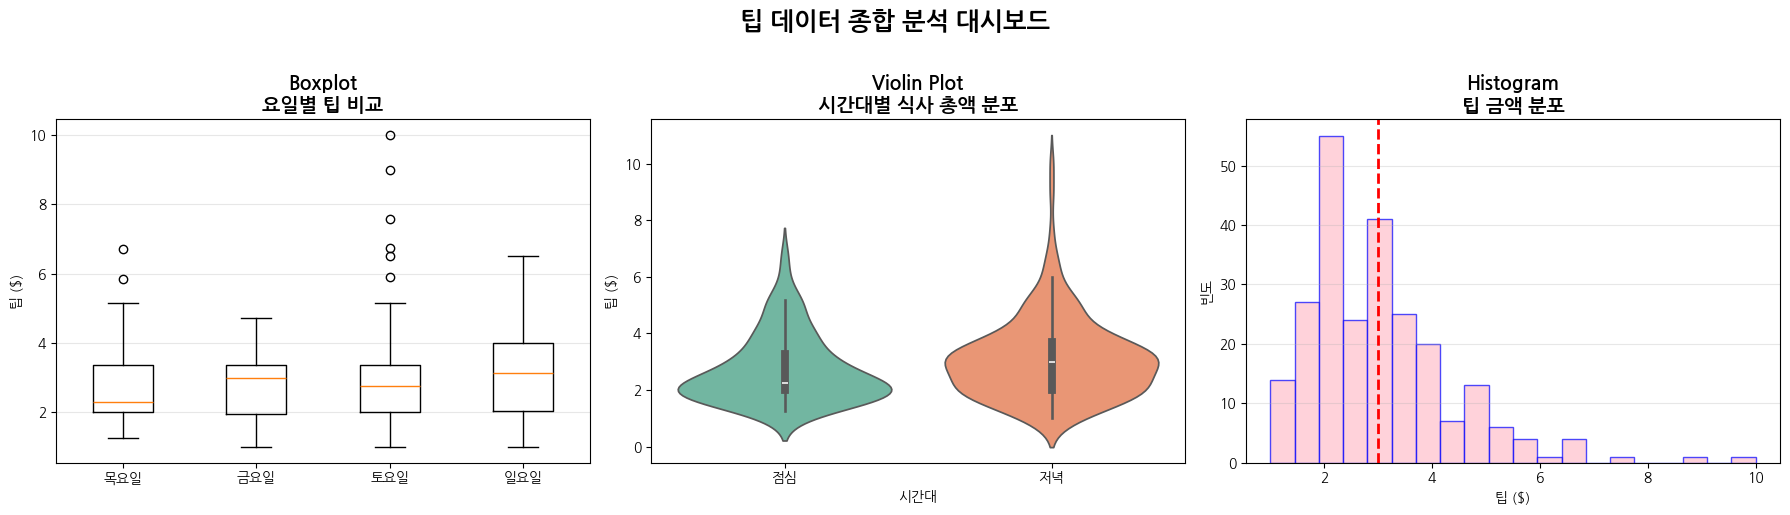

In [104]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

axes[0].boxplot([tips_kr[tips_kr['요일'] == day]['팁'] for day in ['Thur', 'Fri', 'Sat', 'Sun']],
                    tick_labels=['목요일', '금요일', '토요일', '일요일'])
axes[0].set_title('Boxplot\n요일별 팁 비교', fontsize=14, fontweight='bold')
axes[0].set_ylabel('팁 ($)')
axes[0].grid(True, alpha=.3, axis='y')

sns.violinplot(data=tips_kr, x='시간대_kr', y='팁', hue='시간대_kr', palette='Set2', ax=axes[1])
axes[1].set_title('Violin Plot\n시간대별 식사 총액 분포', fontsize=14, fontweight='bold')
axes[1].set_xlabel('시간대')
axes[1].set_ylabel('팁 ($)')

axes[2].hist(tips_kr['팁'], bins=20, color='pink', edgecolor='blue', alpha=.7)
axes[2].axvline(tips_kr['팁'].mean(), color='red', linestyle='--', linewidth=2)
axes[2].set_title('Histogram\n팁 금액 분포', fontsize=14, fontweight='bold')
axes[2].set_xlabel('팁 ($)')
axes[2].set_ylabel('빈도')
axes[2].grid(True, alpha=.3, axis='y')

plt.suptitle('팁 데이터 종합 분석 대시보드', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

 --- 그래프 분석 결과 요약 ---  
 이 대시보드는 팁 데이터에 대한 종합적인 분석 결과를 보여줍니다.
 요일별 팁 비교 (Boxplot): 토요일과 일요일에 팁 금액의 범위가 넓고 중앙값이 높아 더 많은 팁이 발생하는 경향을 보입니다.  

 시간대별 식사 총액 분포 (Violin Plot): 저녁 시간대의 식사 총액이 점심보다 중앙값이 높고 분포도 넓어, 저녁 식사에 더 많은 비용이 지불됨을 알 수 있습니다.  

 팁 금액 분포 (Histogram): 대부분의 팁은 2~4달러 사이에 집중되어 있으며, 평균과 중앙값이 유사하여 분포가 비교적 대칭적입니다. 모든 고객이 최소한의 팁이라도 지불했습니다.

In [106]:
print(f"\n팁 금액 통계:")
print(f"평균: ${tips_kr['팁'].mean():.2f}")
print(f'중앙값: ${tips_kr['팁'].median():.2f}')
print(f'최솟값: ${tips_kr['팁'].min():.2f}')
print(f'최댓값: ${tips_kr['팁'].max():.2f}')
print(f'표준편차: ${tips_kr['팁'].std():.2f}')



팁 금액 통계:
평균: $3.00
중앙값: $2.90
최솟값: $1.00
최댓값: $10.00
표준편차: $1.38


In [110]:
print(f"\n요일별 평균 팁:")
for day, day_kr in zip(['Thur', 'Fri', 'Sat', 'Sun'], ['목요일', '금요일', '토요일', '일요일']):
    avg_tip = tips_kr[tips_kr['요일'] == day]['팁'].mean()
    print(f"{day_kr}: ${avg_tip:.2f}")


요일별 평균 팁:
목요일: $2.77
금요일: $2.73
토요일: $2.99
일요일: $3.26


In [113]:
print(f"\n시간대별 평균 팁:")
#for time in tips_kr['시간대_kr'].unique():
for time in ['저녁', '점심']:
    ave_tip = tips_kr[tips_kr['시간대_kr'] == time]['팁'].mean()
    print(f"{time}: ${ave_tip:.2f}")


시간대별 평균 팁:
저녁: $3.10
점심: $2.73


#이상치 탐지

In [118]:
Q1 =tips_kr['팁'].quantile(.25)
Q3 =tips_kr['팁'].quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = tips_kr[(tips_kr['팁'] < lower_bound) | (tips_kr['팁'] > upper_bound)]

print(f"\nIQR 기준 이상치:")
print(f"정상 범위: ${lower_bound:.2f} ~ ${upper_bound:.2f}")
print(f"이상치 개수: {len(outliers)}개")
if len(outliers) > 0:
    print(f"이상치 데이터: {outliers['팁'].values}")


IQR 기준 이상치:
정상 범위: $-0.34 ~ $5.91
이상치 개수: 9개
이상치 데이터: [ 7.58  6.    6.73  6.7  10.    6.5   9.    6.5   5.92]


팁 데이터의 경우, 팁 금액이 0이 아님을 확인했고, 이상치들이 5.92에서 10.00 달러 사이의 값들입니다. 이러한 값들이 오류가 아닌 실제 높은 팁일 가능성도 있습니다.

만약 모델링에 사용할 데이터의 분포를 안정화하고 싶다면 Capping이나 Transformation이 좋은 선택일 수 있습니다. 데이터의 손실을 최소화하고 싶을 때 적합합니다.

만약 분석의 초점이 '일반적인 팁 패턴'이고, 극단적인 높은 팁이 분석을 왜곡한다고 판단되면, 이상치를 삭제하거나 Capping하여 분석 대상 범위에 포함시키지 않는 것을 고려해볼 수 있습니다.

In [119]:
tips_numeric = tips[['total_bill', 'tip', 'size']]
tips_numeric.columns = ['총액', '팁', '인원']

tips_numeric.head()

,총액,팁,인원
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [120]:
# 상관계수 행렬 계산
correlation_matrix = tips_numeric.corr()

correlation_matrix

,총액,팁,인원
총액,1.000000,0.675734,0.598315
팁,0.675734,1.000000,0.489299
인원,0.598315,0.489299,1.000000


1.00 : 완벽한 양의 상관관계 (자기자신)  

0.8이상 : 강한 양의 상관관계  

0.5~0.8 : 중간 정도 양의 상관관계  

0.3~0.5 : 약한 양의 상관관계  

-0.3~0.3 : 상관관계 거의 없음  

음수 : 음의 상관관계 ( 한쪽 증가 -> 다른쪽 감소 )


#히트맵

빨간색 : 양의 상관관계  
파란색 : 음의 상관관계  
숫자를 함께 표시하여 정확한 값 확인 가능  

여러 변수 간 관계를 빠르게 스캔할 때 매우 유용함

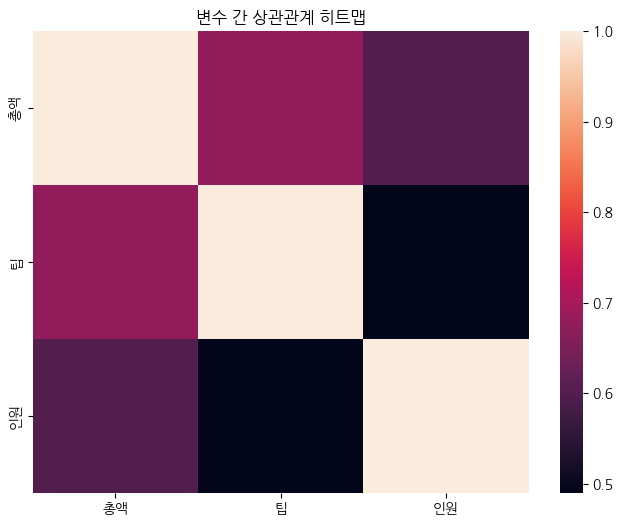

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)

plt.title('변수 간 상관관계 히트맵')
plt.show

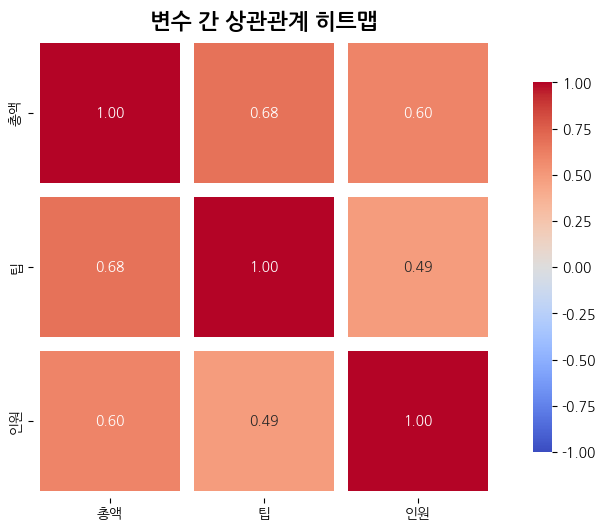

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
            annot=True,                 #숫자표시
            fmt='.2f',                  #소수점 2자리
            cmap='coolwarm',            #색상
            vmin=-1, vmax=1,            #범위 고정
            center=0,                   #중심값 0
            square=True,                #정사각형 셀
            linewidths=10,              #셀 구분선
            cbar_kws={'shrink': .8})    #컬러바 크기

plt.title('변수 간 상관관계 히트맵', fontsize=16, fontweight='bold')
plt.show()

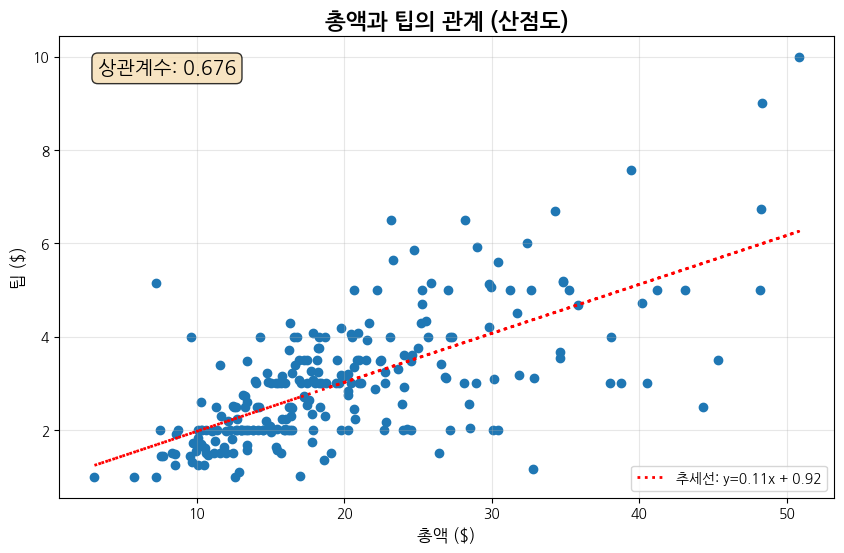

In [136]:
plt.figure(figsize=(10,6))
plt.scatter(tips_numeric['총액'], tips_numeric['팁'])

#추세선 추가 (선형 회귀)
z = np.polyfit(tips_numeric['총액'], tips_numeric['팁'], 1)
p = np.poly1d(z)
plt.plot(tips_numeric['총액'], p(tips_numeric['총액']), 'r:', linewidth=2, label=f'추세선: y={z[0]:.2f}x + {z[1]:.2f}')

#상관계수 표시
corr = tips_numeric['총액'].corr(tips_numeric['팁'])
plt.text(0.05, 0.95, f'상관계수: {corr:.3f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.title('총액과 팁의 관계 (산점도)', fontsize=16, fontweight='bold')
plt.xlabel('총액 ($)', fontsize=12)
plt.ylabel('팁 ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=.3)
plt.show()

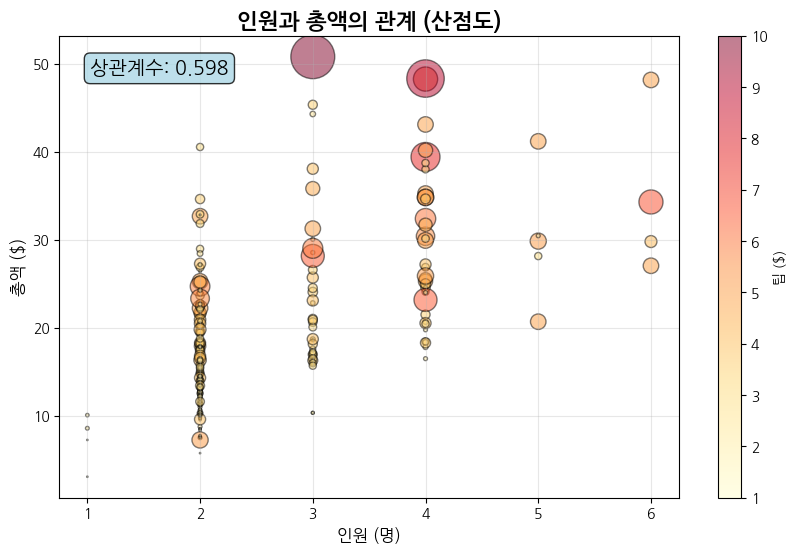

In [147]:
plt.figure(figsize=(10,6))

plt.scatter(tips_numeric['인원'], tips_numeric['총액'], s= tips_numeric['팁']**3, alpha=.5, c=tips_numeric['팁'], cmap='YlOrRd', edgecolors='k')
plt.colorbar(label='팁 ($)')

#상관계수 표시
corr2 = tips_numeric['인원'].corr(tips_numeric['총액'])
plt.text(0.05, 0.95, f'상관계수: {corr2:.3f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.title('인원과 총액의 관계 (산점도)', fontsize=16, fontweight='bold')
plt.xlabel('인원 (명)', fontsize=12)
plt.ylabel('총액 ($)', fontsize=12)
plt.grid(True, alpha=.3)